# Generate random nodes

In [1]:
import random
import numpy as np


def generateNodes(width, height, nodesNumber):
    xs = np.random.randint(width, size=nodesNumber)
    ys = np.random.randint(height, size=nodesNumber)

    print('1.Nodes and coordinates', np.column_stack((xs, ys)))
    return np.column_stack((xs, ys))


# Functions to calculate initial weight

In [2]:
import math


def vectorToDistMatrix(coords):
    '''
    Create the distance matrix
    '''
    return np.sqrt((np.square(coords[:, np.newaxis] - coords).sum(axis=2)))


def nearestNeighbourSolution(dist_matrix):
    '''
    Computes the initial solution (nearest neighbour strategy)
    '''
    node = random.randrange(len(dist_matrix))
    result = [node]

    nodes_to_visit = list(range(len(dist_matrix)))
    nodes_to_visit.remove(node)

    while nodes_to_visit:
        nearest_node = min([(dist_matrix[node][j], j) for j in nodes_to_visit], key=lambda x: x[0])
        node = nearest_node[1]
        nodes_to_visit.remove(node)
        result.append(node)

    return result


# Class for simulated annealing

In [3]:
import math
import matplotlib.pyplot as plt


class SimulatedAnnealing:
    def __init__(self, coords, temp, alpha, stopping_temp, stopping_iter):
        ''' animate the solution over time

            Parameters
            ----------
            coords: array_like
                list of coordinates
            temp: float
                initial temperature
            alpha: float
                rate at which temp decreases
            stopping_temp: float
                temerature at which annealing process terminates
            stopping_iter: int
                interation at which annealing process terminates

        '''

        self.coords = coords
        self.sample_size = len(coords)
        self.temp = temp
        self.alpha = alpha
        self.stopping_temp = stopping_temp
        self.stopping_iter = stopping_iter
        self.iteration = 1

        self.dist_matrix = vectorToDistMatrix(coords)
        self.curr_solution = nearestNeighbourSolution(self.dist_matrix)
        self.best_solution = self.curr_solution

        self.solution_history = [self.curr_solution]

        self.curr_weight = self.weight(self.curr_solution)
        self.initial_weight = self.curr_weight
        self.min_weight = self.curr_weight

        self.weight_list = [self.curr_weight]

        print('2.Intial weight: ', self.curr_weight)

    def weight(self, sol):
        '''
        Calcuate weight
        '''
        return sum([self.dist_matrix[i, j] for i, j in zip(sol, sol[1:] + [sol[0]])])

    def acceptance_probability(self, candidate_weight):
        '''
        Acceptance probability as described in:
        https://stackoverflow.com/questions/19757551/basics-of-simulated-annealing-in-python
        '''
        return math.exp(-abs(candidate_weight - self.curr_weight) / self.temp)

    def accept(self, candidate):
        '''
        Accept with probability 1 if candidate solution is better than
        current solution, else accept with probability equal to the
        acceptance_probability()
        '''
        candidate_weight = self.weight(candidate)
        if candidate_weight < self.curr_weight:
            self.curr_weight = candidate_weight
            self.curr_solution = candidate
            if candidate_weight < self.min_weight:
                self.min_weight = candidate_weight
                self.best_solution = candidate

        else:
            if random.random() < self.acceptance_probability(candidate_weight):
                self.curr_weight = candidate_weight
                self.curr_solution = candidate

    def anneal(self):
        '''
        Annealing process with 2-opt
        described here: https://en.wikipedia.org/wiki/2-opt
        '''
        while self.temp >= self.stopping_temp and self.iteration < self.stopping_iter:
            candidate = list(self.curr_solution)
            l = random.randint(2, self.sample_size - 1)
            i = random.randint(0, self.sample_size - l)

            candidate[i: (i + l)] = reversed(candidate[i: (i + l)])

            self.accept(candidate)
            self.temp *= self.alpha
            self.iteration += 1
            self.weight_list.append(self.curr_weight)
            self.solution_history.append(self.curr_solution)

        print('3.Minimum weight: ', self.min_weight)
        print('Improvement: ',
              round((self.initial_weight - self.min_weight) / (self.initial_weight), 4) * 100, '%')
        print('Solution:', self.best_solution)

    def plotLearning(self):
        plt.plot([i for i in range(len(self.weight_list))], self.weight_list)
        line_init = plt.axhline(y=self.initial_weight, color='r', linestyle='--')
        line_min = plt.axhline(y=self.min_weight, color='g', linestyle='--')
        plt.legend([line_init, line_min], ['Initial weight', 'Optimized weight'])
        plt.ylabel('Weight')
        plt.xlabel('Iteration')
        plt.show()

# Main code

1.Nodes and coordinates [[ 92  28]
 [ 96 106]
 [ 88  82]
 [ 97 158]
 [176  62]
 [ 85 117]
 [ 37 116]
 [197 177]
 [ 63  28]
 [109  61]
 [ 41  30]
 [140  74]
 [ 42  91]
 [174   1]
 [ 59 190]
 [ 94 172]
 [131   2]
 [ 73  81]
 [ 30 143]
 [  7 138]
 [ 56  37]
 [187 194]
 [ 72  98]
 [ 64 188]
 [ 37 195]
 [126 172]
 [ 31  46]
 [142  79]
 [194 191]
 [114 192]]
2.Intial weight:  1172.9626985451307
3.Minimum weight:  936.9597399180572
Improvement:  20.119999999999997 %
Solution: [19, 18, 24, 14, 23, 15, 3, 29, 25, 21, 28, 7, 1, 5, 22, 17, 2, 9, 11, 27, 4, 13, 16, 0, 8, 20, 10, 26, 12, 6]


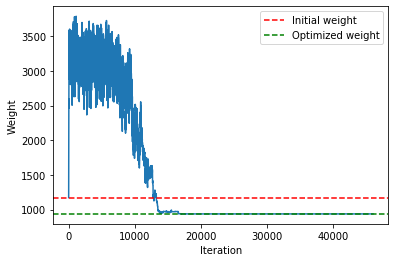

In [4]:
'''set the simulated annealing algorithm params'''
temperature = 10000
stopping_temp = 0.000001
alpha = 0.9995
stopping_iter = 20000000

'''set the dimensions of the grid'''
size_width = 200
size_height = 200

'''set the number of nodes'''
population_size = 30

'''generate random list of nodes'''
nodes = generateNodes(size_width, size_height, population_size)

'''run simulated annealing algorithm with 2-opt'''
sa = SimulatedAnnealing(nodes, temperature, alpha, stopping_temp, stopping_iter)
sa.anneal()

'''show the improvement over time'''
sa.plotLearning()    